In [1]:
import tensorflow as tf 

#get dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2022-05-17 22:14:55.238932: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-17 22:14:55.238963: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#normalization
x_train = x_train/255
x_test = x_test/255

In [3]:
#neural net
neural_net = tf.keras.Sequential()
neural_net.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
neural_net.add(tf.keras.layers.Dense(16, activation='relu'))
neural_net.add(tf.keras.layers.Dense(16, activation='relu'))
neural_net.add(tf.keras.layers.Dense(10, activation='softmax'))

neural_net.summary()

2022-05-17 22:15:28.927817: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-17 22:15:28.927861: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-17 22:15:28.927891: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vo): /proc/driver/nvidia/version does not exist
2022-05-17 22:15:28.954405: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [4]:
#training
neural_net.compile('adam', loss='categorical_crossentropy', metrics = ['accuracy'])

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

model_history = neural_net.fit(x_train, y_train, validation_split=.2, batch_size=32, epochs=10)

2022-05-17 22:15:29.757429: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/10
1484/1500 [============================>.] - ETA: 0s - loss: 0.4941 - accuracy: 0.8566

2022-05-17 22:15:44.345571: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37632000 exceeds 10% of free system memory.


1500/1500 [==============================] - 7s 3ms/step - loss: 0.4919 - accuracy: 0.8572 - val_loss: 0.2544 - val_accuracy: 0.9282
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2440 - accuracy: 0.9295 - val_loss: 0.2047 - val_accuracy: 0.9438
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2040 - accuracy: 0.9408 - val_loss: 0.1903 - val_accuracy: 0.9463
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1827 - accuracy: 0.9468 - val_loss: 0.1784 - val_accuracy: 0.9500
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1668 - accuracy: 0.9505 - val_loss: 0.1674 - val_accuracy: 0.9523
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1560 - accuracy: 0.9539 - val_loss: 0.1678 - val_accuracy: 0.9528
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1471 - accuracy: 0.9563 - val_loss: 0.1644 - val_accuracy: 0.9544
Epo

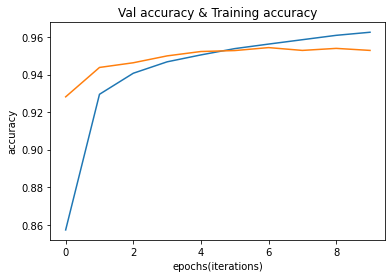

In [5]:
import matplotlib.pyplot as plt

#accuracy graph
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Val accuracy & Training accuracy')

plt.xlabel('epochs(iterations)')
plt.ylabel('accuracy')
plt.show()

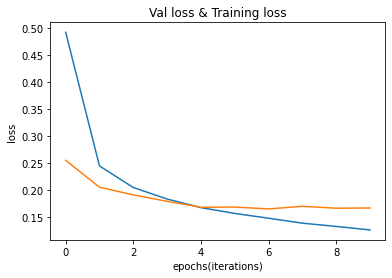

In [6]:
#loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Val loss & Training loss')

plt.xlabel('epochs(iterations)')
plt.ylabel('loss')
plt.show()

In [7]:
predictions = neural_net.predict([x_test])

2022-05-17 22:16:20.930938: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


In [8]:
import random as rand
import numpy as np 

randomIndex = rand.randint(0, 10000)

print("predicted value is: ", np.argmax(predictions[randomIndex]))

predicted value is:  4


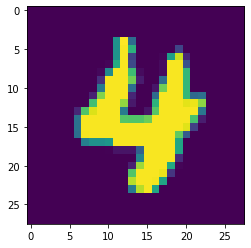

In [9]:
plt.imshow(x_test[randomIndex])
plt.show()

In [37]:
#images labeled as 6
six_indices = []

counter = 0

for i in range(x_test.shape[0]):
    if y_test[i][6] == 1:
        print(i)
        six_indices.append(i)
        counter +=1
    if counter ==10:
        break;

11
21
22
50
54
66
81
88
91
98


In [38]:
#images labeled as 9
nine_indices = []

counter = 0

for i in range(x_test.shape[0]):
    if y_test[i][9] == 1:
        print(i)
        nine_indices.append(i)
        counter +=1
    if counter ==10:
        break;

7
9
12
16
20
58
62
73
78
92


In [39]:
# Images labeled as 4
four_indices = []

counter = 0

for i in range(x_test.shape[0]):
    if y_test[i][4] == 1:
        print(i)
        four_indices.append(i)
        counter +=1
    if counter ==10:
        break;

4
6
19
24
27
33
42
48
49
56


In [40]:
len(six_indices)

10

In [41]:
len(four_indices)

10

In [42]:
len(nine_indices)

10